<a href="https://colab.research.google.com/github/VIRU2341/alma-better1/blob/main/AIR_BNB_BOOKING_EDA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Air Bnb Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Project By**      - Virendra Singh Rawat


# **Project Summary -**

This EDA project is on Airbnb booking analysis.Today Airbnb has became one of a kind services that is used and recognized by the whole world.Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Nowadays, Airbnb became one of a kind service that is used by the whole world. Data analysts become a crucial factor for the company that provided millions of listings through Airbnb. These listings generate a lot of data that can be analyzed and used for security, business decisions, understanding of customers and providers behavior on the platform, implementing innovative additional services, guiding marketing initiatives, and much more. This dataset has around 49000 observations in it with 16 columns and it is a mix of categorical and numerical values.

# **GitHub Link -**

https://github.com/VIRU2341/alma-better1.git



# **Problem Statement**


**Lets explore and analyze the dataset and find some insights.**

1.What are the different areas and hosts?

2.What are the different locations ,prices according to area,reviews,room types?.

3.Which hosts is the busy one and which hosts is charging higher prices?

4.What is the room count in NYC according to listing room types?

5.What is the correlation between different variables?

#### **Define Your Business Objective?**

My task is to explore and analyse the data to discover the important factors that govern the bookings of the hotel room.These important factors can guide hotels to make different strategies for different customer to increase their buisness.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [20]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px 
import missingno as msno  


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape


(48895, 16)

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()


0

In [10]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(48895, 16)

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.dropna(inplace = True)

<Axes: >

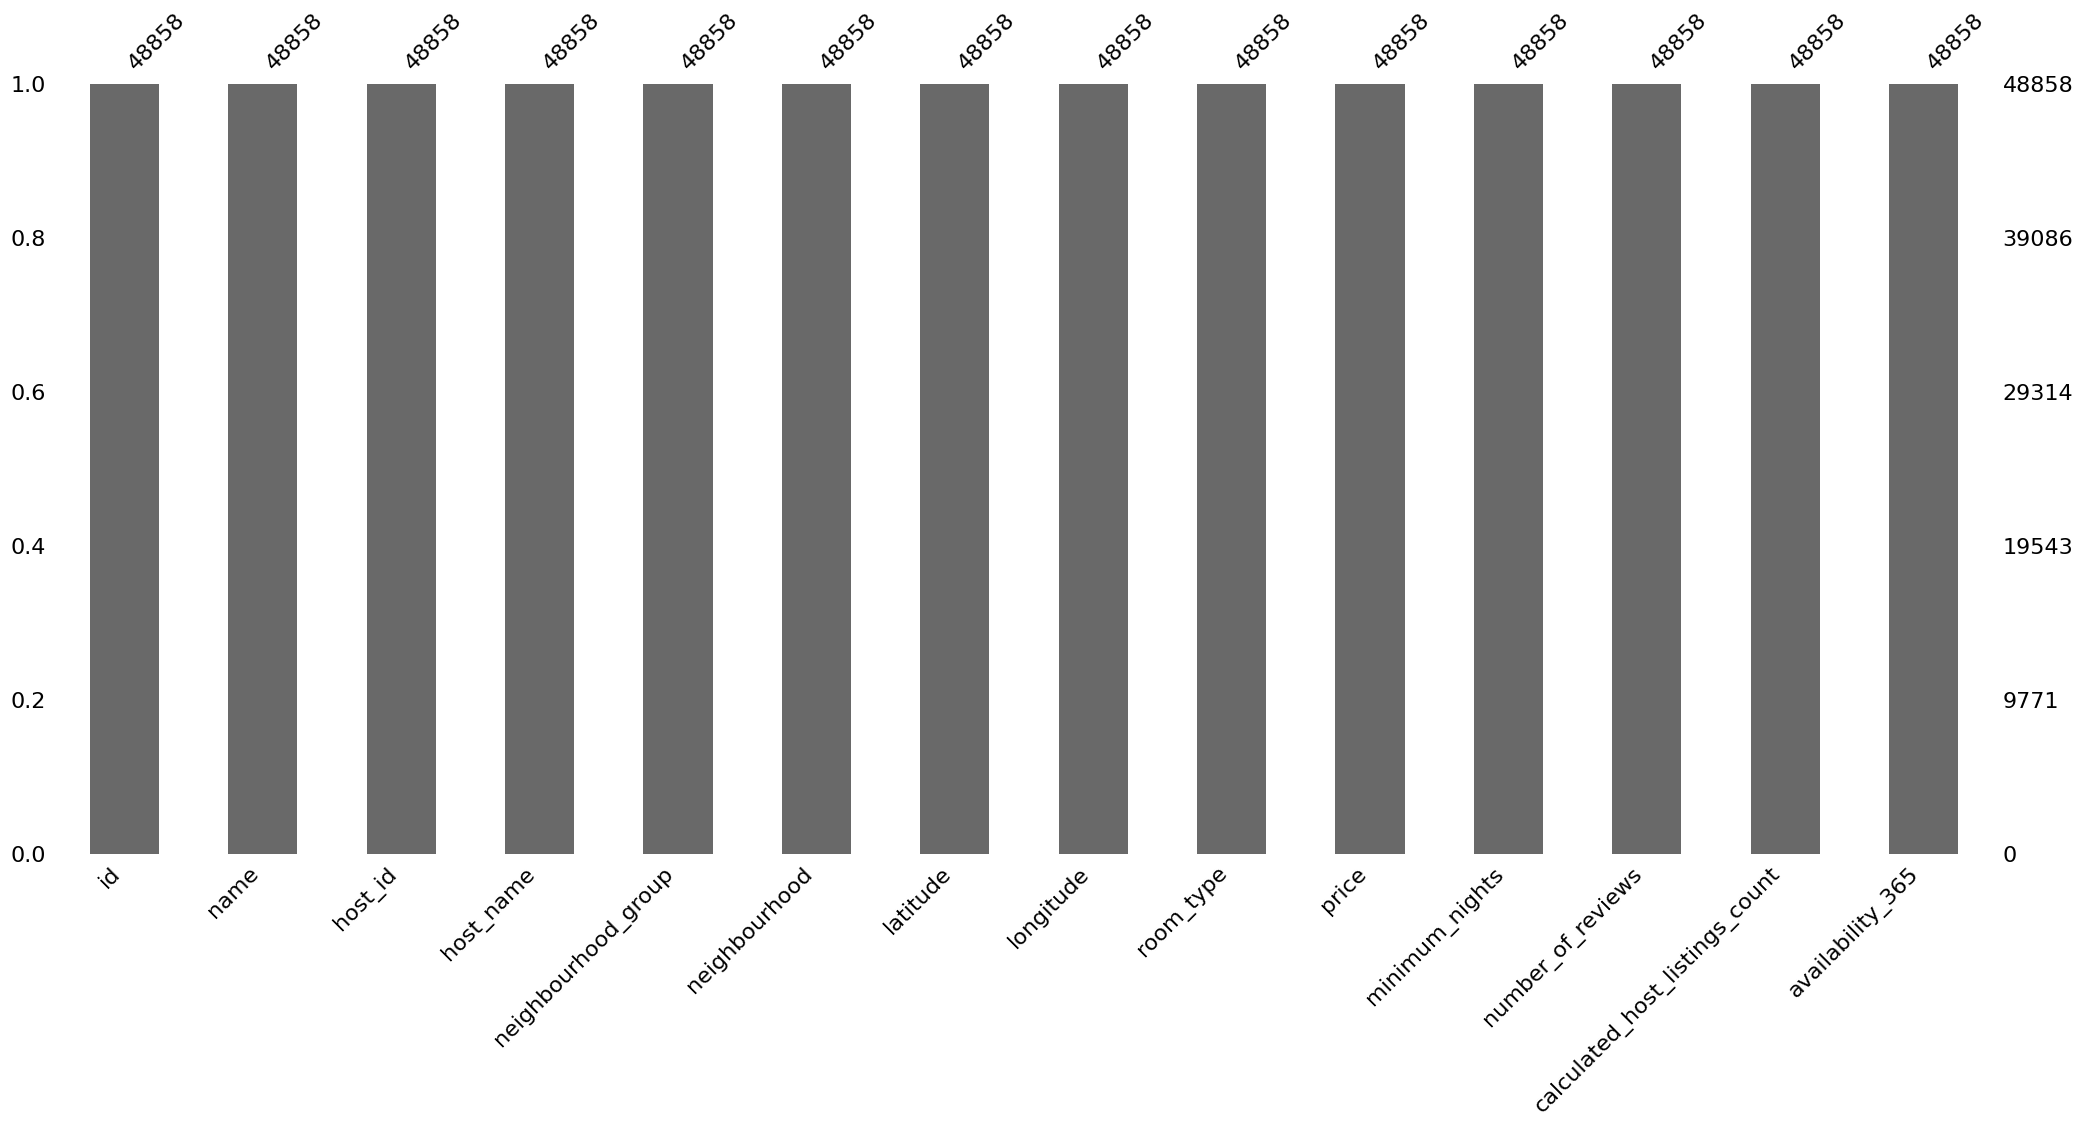

In [24]:
# Visualizing the missing values
msno.bar(df)



### What did you know about your dataset?

From the above data we can see that there are total four columns with missing/null values:name,host_name,last_review,reviews_per_month.



## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description 

**id**:   Unique ID


**name**: Name of the listing


**host_id**: Unique host_id


**host_name**: Name of the host


**neighbourhood_group**: location


**neighborhood**: area


**latitude**:  Latitude range


**longitude**: Longitude range


**room_type**: Type of listing


**price**: Price of listing


**minimum_nights**: Minimum nights to be paid for


**Number of reviews**: Number of reviews


**last_review**: Content of the last review


**reviews_per_month**: Number of checks per month


**calculated_host_listing**: Total count


**availability_365**: Availability around the year




### Check Unique Values for each variable.

In [ ]:
pd.Series({col:df[col].unique() for col in df})
 

id                                [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...
name                              [Clean & quiet apt home by the park, Skylit Mi...
host_id                           [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...
host_name                         [John, Jennifer, Elisabeth, LisaRoxanne, Laura...
neighbourhood_group               [Brooklyn, Manhattan, Queens, Staten Island, B...
neighbourhood                     [Kensington, Midtown, Harlem, Clinton Hill, Ea...
latitude                          [40.64749, 40.75362, 40.80902, 40.68514, 40.79...
longitude                         [-73.97237, -73.98377, -73.9419, -73.95976, -7...
room_type                              [Private room, Entire home/apt, Shared room]
price                             [149, 225, 150, 89, 80, 200, 60, 79, 135, 85, ...
minimum_nights                    [1, 3, 10, 45, 2, 5, 4, 90, 7, 14, 60, 29, 30,...
number_of_reviews                 [9, 45, 0, 270, 74, 49, 430, 118, 160, 53,

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df.drop(['last_review','reviews_per_month'], axis = 1, inplace = True)
df.dropna(inplace = True)


In [15]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [17]:
df.shape

(48858, 14)

In [18]:
pd.Series({col:df[col].unique() for col in df})

id                                [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...
name                              [Clean & quiet apt home by the park, Skylit Mi...
host_id                           [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...
host_name                         [John, Jennifer, Elisabeth, LisaRoxanne, Laura...
neighbourhood_group               [Brooklyn, Manhattan, Queens, Staten Island, B...
neighbourhood                     [Kensington, Midtown, Harlem, Clinton Hill, Ea...
latitude                          [40.64749, 40.75362, 40.80902, 40.68514, 40.79...
longitude                         [-73.97237, -73.98377, -73.9419, -73.95976, -7...
room_type                              [Private room, Entire home/apt, Shared room]
price                             [149, 225, 150, 89, 80, 200, 60, 79, 135, 85, ...
minimum_nights                    [1, 3, 10, 45, 2, 5, 4, 90, 7, 14, 60, 29, 30,...
number_of_reviews                 [9, 45, 0, 270, 74, 49, 430, 118, 160, 53,

### What all manipulations have you done and insights you found?

While doing manipilations in the data i have filled missing values with with 0 in children,company and agent columns as those columns had numerical value.
After doing all the manipulation in the dataset these were the insights i found:

1.These are 2 types of hotel which guests could book so i can find which type of hotel was booked most.

2.Guest can cancel their bookings.

3.There are different types of guests from different country.

4.There are different food wgich the guest order.

5.Guest can book the ticket from different sources.

6.The ADR column is used to analyze hotel performance on the basis of revenue.

7.Guest can choose rooms of their liking while booking.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

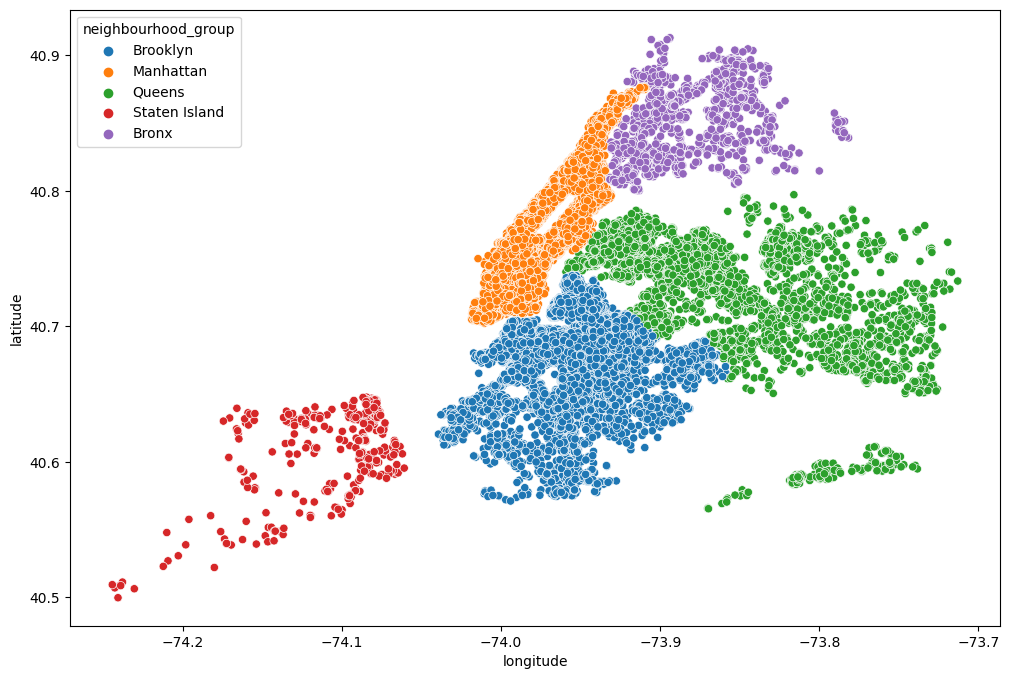

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

##### 1. Why did you pick the specific chart?

I used this chart because it shows the scattering plot of neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen clearly that there are 5 different neighbourhood group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The scatter chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels.

#### Chart - 2

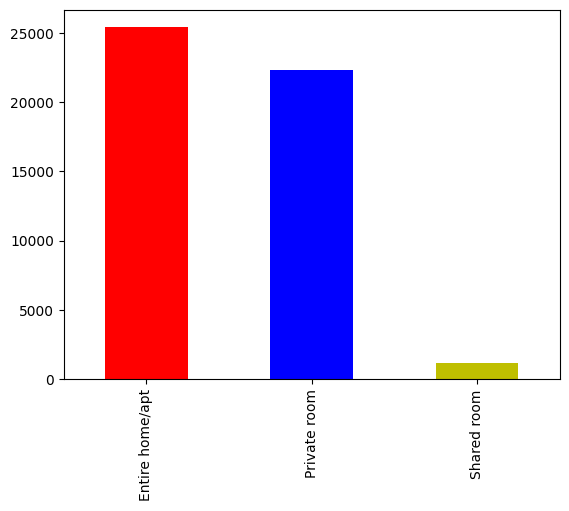

In [ ]:
# Chart -2 visualization code
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()


##### 1. Why did you pick the specific chart?

To check the distribution of the room type i used the bar chart. 

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that  the Entire home and Private data is more than that of shared rooms. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 From the above chart its clear the Entire home and Private data is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently.

#### Chart - 3

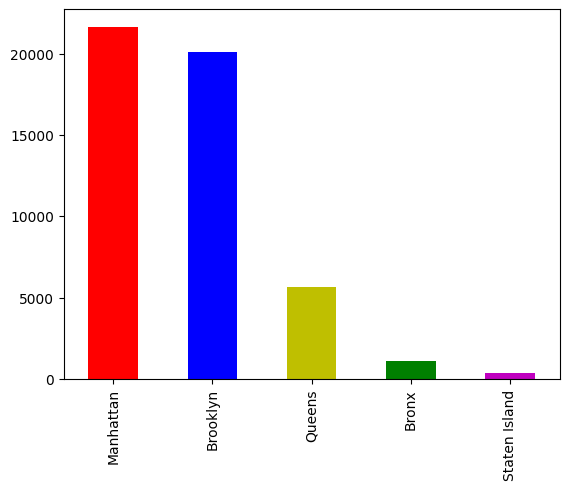

In [ ]:
# Chart - 3 visualization code
df['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()

##### 1. Why did you pick the specific chart?

Here i compared the neighbourhood group value.

##### 2. What is/are the insight(s) found from the chart?

From the above Manhattan and Brooklyn has more number of listing that the Queens,Bronx and Staten island.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are no insights that lead to negative growth.Above insight shows that  Manhattan and Brooklyn has more number of listing that the Queens,Bronx and Staten island 

#### Chart - 4

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


<Axes: xlabel='price'>

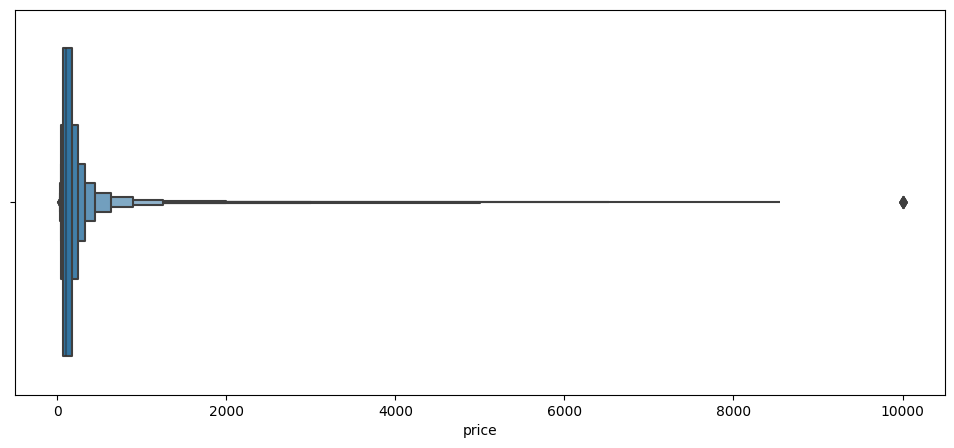

In [ ]:
# Chart - 4 visualization code
print(df['price'].describe())
plt.figure(figsize=(12,5))
sns.boxenplot(x='price',data=df)


##### 1. Why did you pick the specific chart?

For comparing the prices i have used this boxenplot.

##### 2. What is/are the insight(s) found from the chart?

From above insight show that the Price ranges from  0−180. But there are also exists price which has a maximum of $10000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The maximum range of price is between 70-180.But we can also see from the above chart  there are few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.There are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. 

#### Chart - 5

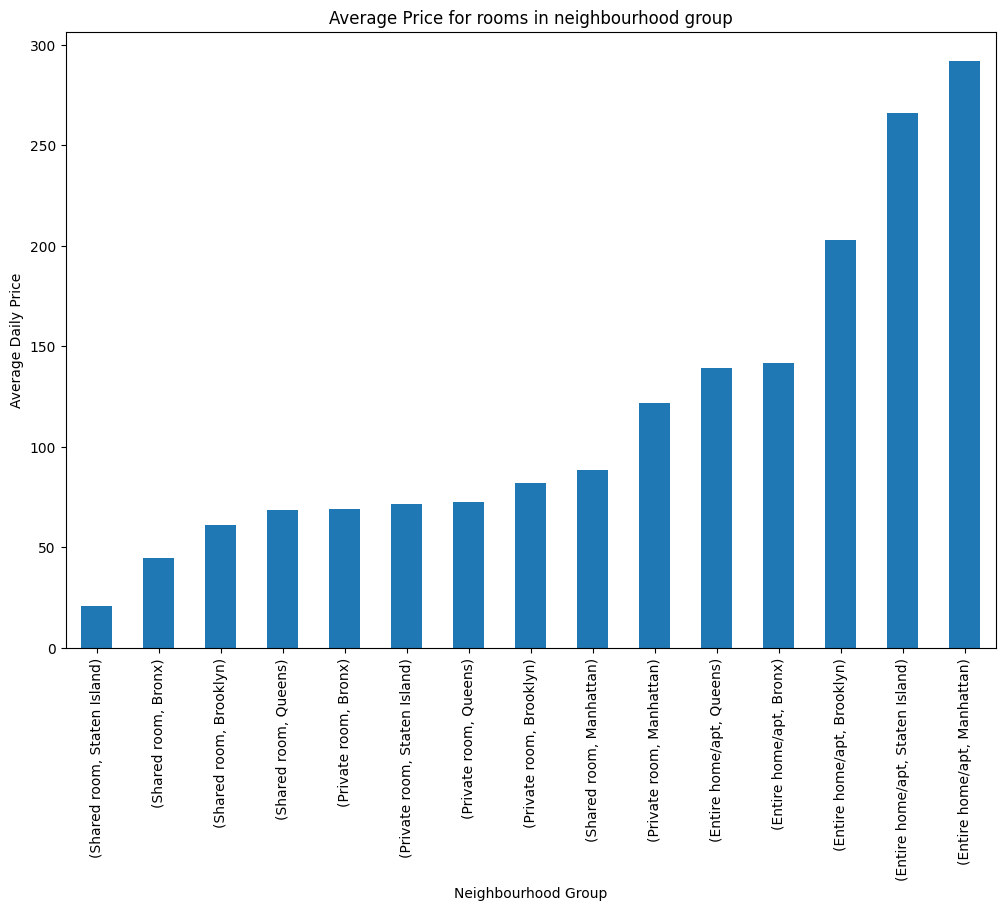

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12,8))
df1 = df[df['minimum_nights']==1]
df2= df1.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df2.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()

##### 1. Why did you pick the specific chart?

For comparing average price per night i use the bar chart.

##### 2. What is/are the insight(s) found from the chart?

From above insight shows that staying at a Apartment is an expensive stay than shared room/private rooms for any location. This is so because Entire room is rented out by family for nice stay where privacy is also one of the major factor. Whereas Stay at Shared rooms are being preferred by travellers who generally don't wish to stay for long time at a particular place and moves around places quickly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Average price for Private room is also considerably expensive at Manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.The average price of Manhattan needs to minimised to around 60 dollar.

#### Chart - 6

Top 20 most expensive locality in Airbnb listing are :


<ipython-input-32-926f890cd57f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


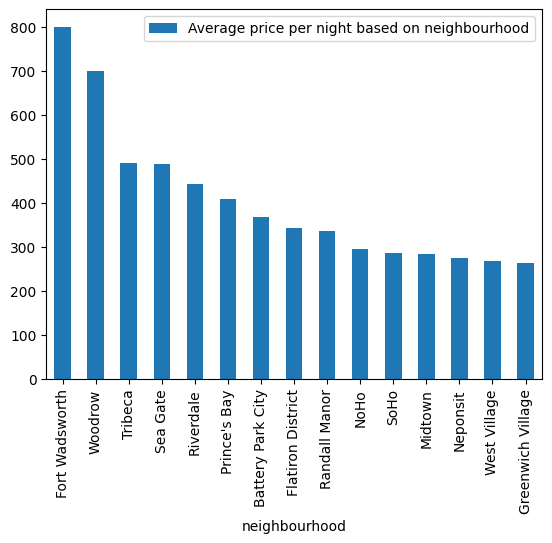

Average price per night based on neighbourhood
neighbourhood                                                    
Fort Wadsworth                                         800.000000
Woodrow                                                700.000000
Tribeca                                                490.638418
Sea Gate                                               487.857143
Riverdale                                              442.090909
Prince's Bay                                           409.500000
Battery Park City                                      367.086957
Flatiron District                                      341.925000
Randall Manor                                          336.000000
NoHo                                                   295.717949
SoHo                                                   287.103352
Midtown                                                282.719094
Neponsit                                               274.666667
West Village                                           267.682292
Greenwich Village                                      263.503836

In [ ]:
# Chart - 6 visualization code
print('Top 20 most expensive locality in Airbnb listing are :')
df3 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df3.plot(kind='bar')
plt.show()
pd.DataFrame(df3)

##### 1. Why did you pick the specific chart?

For comparing value across the neighbourhood group i use the bar chart.

##### 2. What is/are the insight(s) found from the chart?

So according to the above plot Fort Wadsworth is the most expensive in terms of neighbourhood. Whereas Buul's head is the least expensive to stay.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights will help in creating a positive business impact this will help a traveller to choose the appropriate neighbourhood based on his budget. This is very much important in terms of price to understand which locality has the highest price margin in terms of night being spend by traveller.

#### Chart - 7

Least expensive neighbourhood according to Airbnb listing are


<ipython-input-33-702400529bf5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


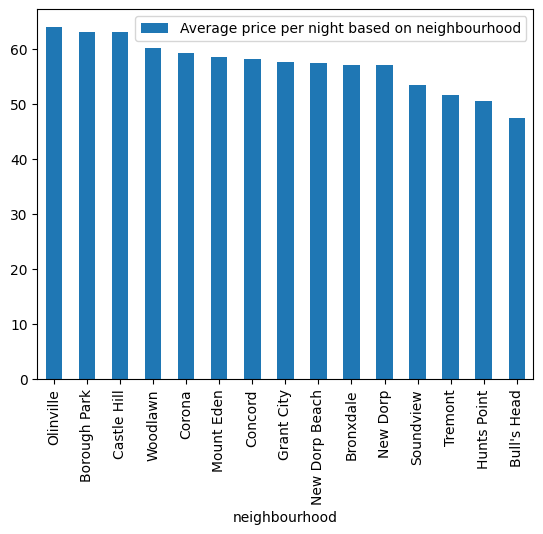

Average price per night based on neighbourhood
neighbourhood                                                 
Olinville                                            64.000000
Borough Park                                         63.066176
Castle Hill                                          63.000000
Woodlawn                                             60.090909
Corona                                               59.171875
Mount Eden                                           58.500000
Concord                                              58.192308
Grant City                                           57.666667
New Dorp Beach                                       57.400000
Bronxdale                                            57.105263
New Dorp                                             57.000000
Soundview                                            53.466667
Tremont                                              51.545455
Hunts Point                                          50.500000
Bull's Head                                          47.333333

In [ ]:
# Chart - 7 visualization code
print('Least expensive neighbourhood according to Airbnb listing are')
df3 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(15)

df3.plot(kind='bar')
plt.show()
pd.DataFrame(df3)

##### 1. Why did you pick the specific chart?

i used this chart to compare the least expensive neighbourhood according to Airbnb listing.

##### 2. What is/are the insight(s) found from the chart?

From the above bar chart the average least price is off bull's head which is $47 and the highest average price per night is of olinville which is 64 dollar.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight that lead to negative growth,the average price per night is almost same ranging between 50 to 64 dollar.

#### Chart - 8

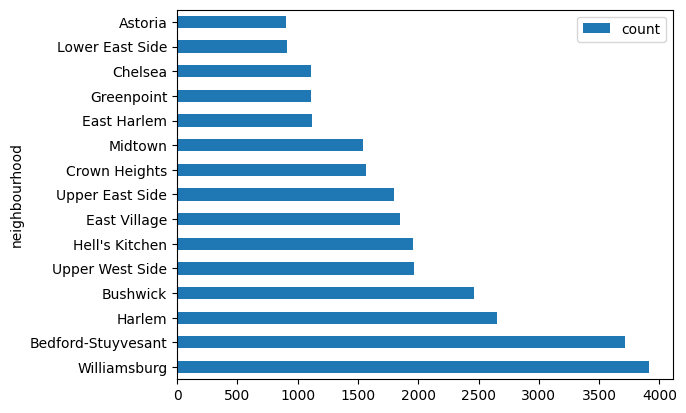

count
neighbourhood            
Williamsburg         3917
Bedford-Stuyvesant   3713
Harlem               2655
Bushwick             2462
Upper West Side      1969
Hell's Kitchen       1954
East Village         1852
Upper East Side      1797
Crown Heights        1563
Midtown              1545
East Harlem          1116
Greenpoint           1113
Chelsea              1112
Lower East Side       911
Astoria               900

In [ ]:
# Chart - 8 visualization code
df4 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df4.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df4.head(15))


##### 1. Why did you pick the specific chart?

I have used this graph to figure out how many number of neighbourhood has been posted based on the count. 

##### 2. What is/are the insight(s) found from the chart?

The insight from the above chart can be clearly seen that Williamsburg has most number of listing count where as Fort Wadesworth has one of the least listing i.e 1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight.If we recall this neighbourhood is one of the highest stay based on price so this can be one of the reason that the price is increased due to the less number of listing.

#### Chart - 9

Least Listing number of count


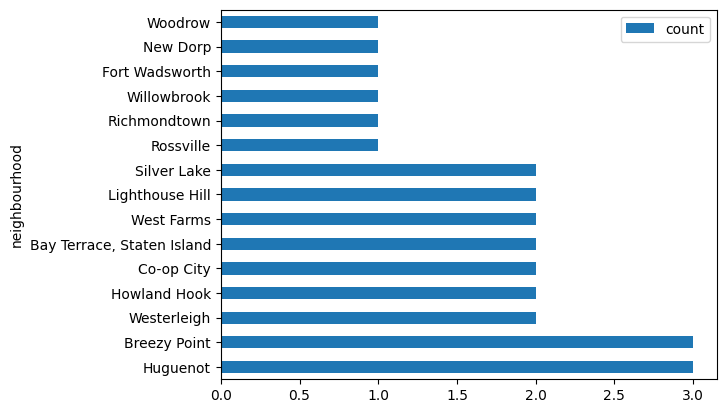

count
neighbourhood                    
Huguenot                        3
Breezy Point                    3
Westerleigh                     2
Howland Hook                    2
Co-op City                      2
Bay Terrace, Staten Island      2
West Farms                      2
Lighthouse Hill                 2
Silver Lake                     2
Rossville                       1
Richmondtown                    1
Willowbrook                     1
Fort Wadsworth                  1
New Dorp                        1
Woodrow                         1

In [ ]:
# Chart - 9 visualization code
print('Least Listing number of count')
df4 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df4.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df4.tail(15))

##### 1. Why did you pick the specific chart?

I have used this graph to figure out how least number of neighbourhood has been posted based on the count.

##### 2. What is/are the insight(s) found from the chart?

The insight from the above chart can be clearly seen that Williamsburg has least number of listing count are Rossville,Richmondtown	,Willowbrook,FortWadsworth,New Dorp	,Woodrow where as Fort Wadesworth has least listing count i,e 1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight.least number of listing count are Rossville,Richmondtown ,Willowbrook,FortWadsworth,New Dorp ,Woodrow where as Fort Wadesworth has least listing count i,e 1.


#### Chart - 10

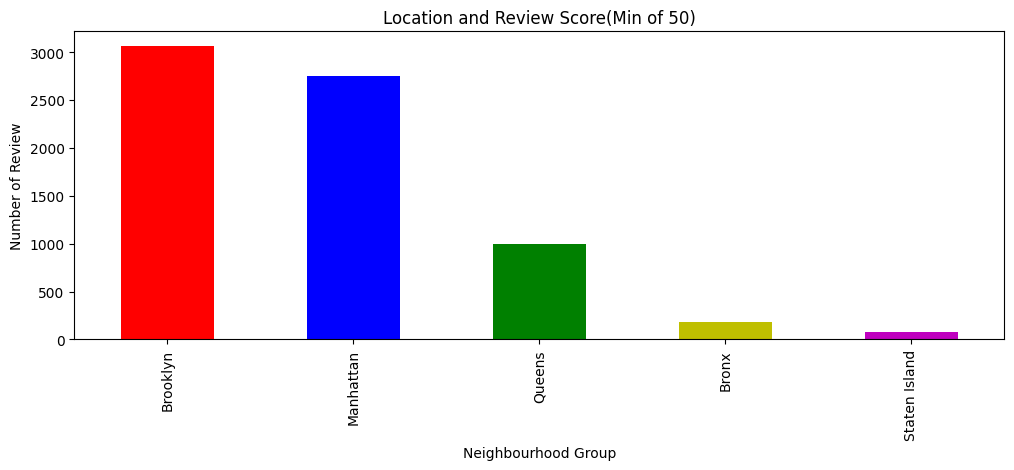

 Count of Review v/s neighbourhood group


neighbourhood_group
Brooklyn                      3063
Manhattan                     2747
Queens                         997
Bronx                          187
Staten Island                   81

In [ ]:
# Chart - 10 visualization code
fig = plt.figure(figsize=(12,4))
review_50 = df[df['number_of_reviews']>=50]
df5 = review_50['neighbourhood_group'].value_counts()
df5.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df5)

##### 1. Why did you pick the specific chart?

To count the  number of reviews with the neighbhourhood group i use this bar chart.

##### 2. What is/are the insight(s) found from the chart?

This insights shows that  Brooklyn got most review in comparison to Manhattan and others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights will help in creating a positive business impact.From the above chart it is clear that review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially.So according to the above plot, Brooklyn got most review in comparison to Manhattan and that is an interesting fact. Also Staten Island which is cheaper has less review than the other neighbourhood group.

#### Chart - 11

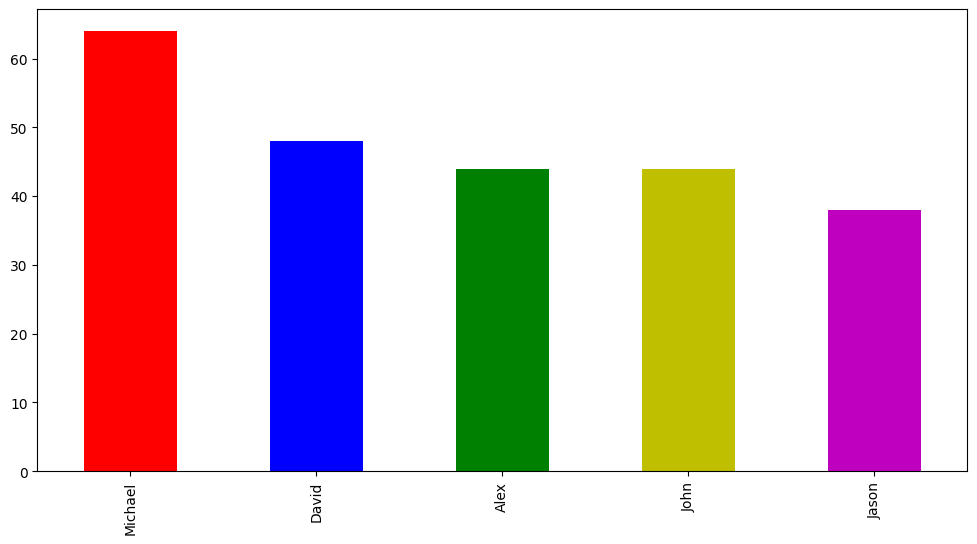

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12,6))
review_50.head(2)
df6 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])

##### 1. Why did you pick the specific chart?

To compare who is our top 5 host i use this bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above insight it is clear that Micheal has received the most reviews as compared to others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight.Based on the review score(Minimum 50)  this increases the confidence of tourist before booking.


#### Chart - 12

<Axes: xlabel='availability_365', ylabel='price'>

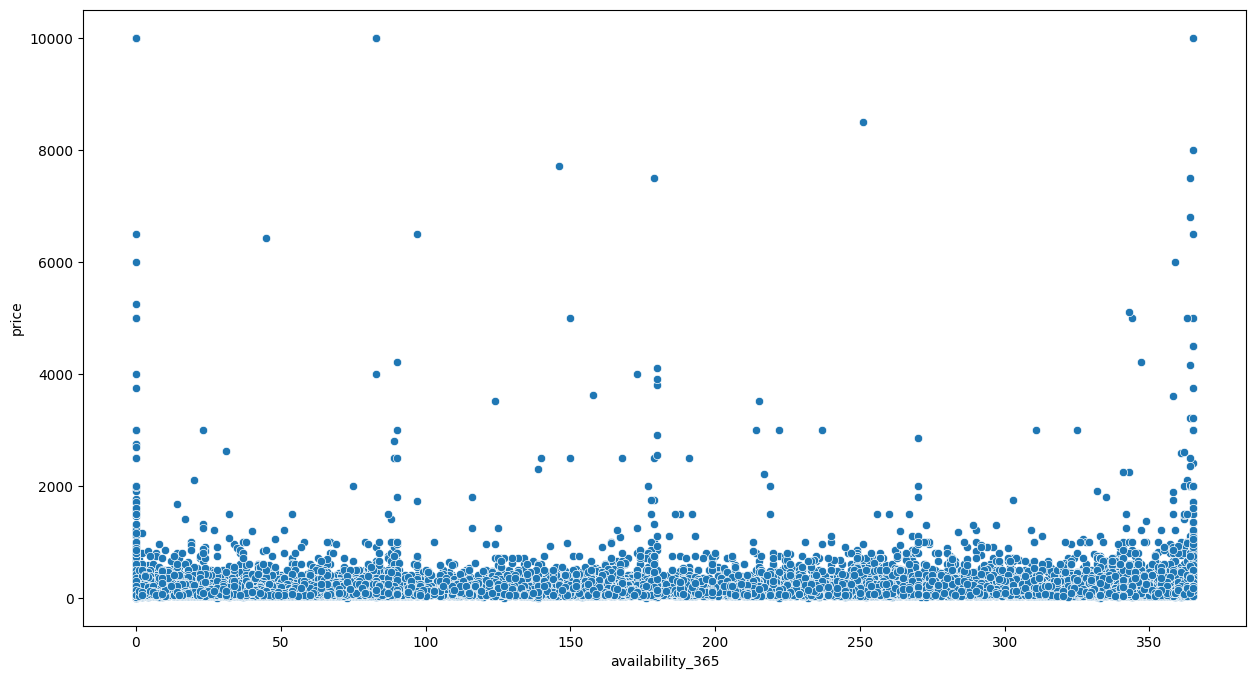

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

##### 1. Why did you pick the specific chart?

We will plot a scatterplot to understand if there is any price increase based on the availability.

##### 2. What is/are the insight(s) found from the chart?

The insight is  looks like with availability with 365 the price increases to 10K.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative growth.But with availability_365 the price increases to 10K.

#### Chart - 13

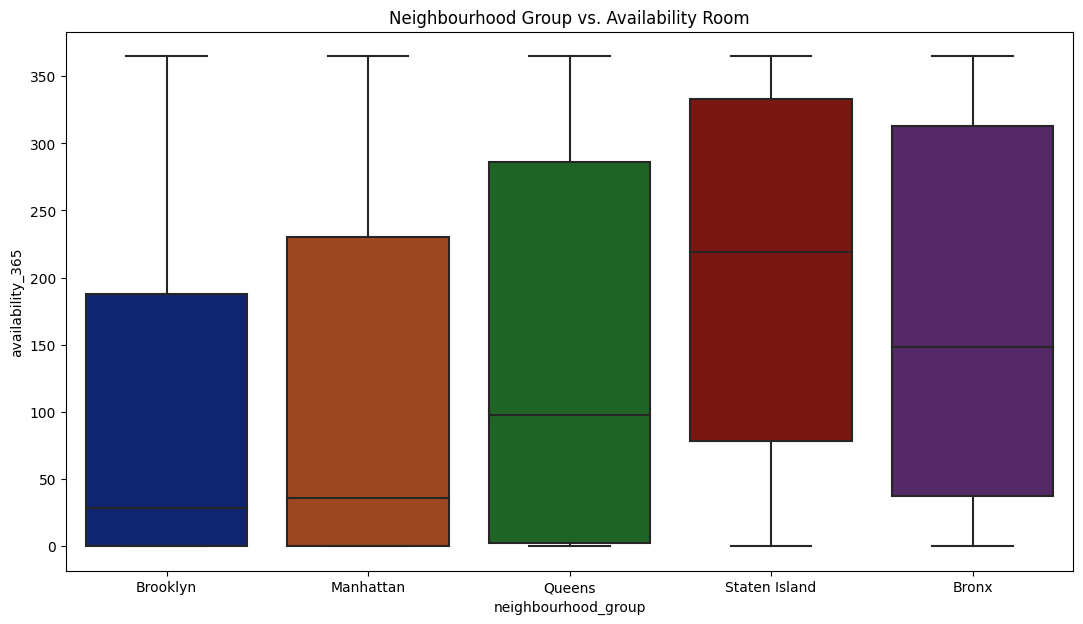

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

##### 1. Why did you pick the specific chart?

The graph above shows the relationship between the availability room and neighborhood group.

##### 2. What is/are the insight(s) found from the chart?

The insight is that the availaibility in staten island is highest with a mean of 200.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight lead to the negative growth as the mean availiability of Brookyln and Manhattan is less.Focus and policy should be made to increase the availability in Brookyln and Manhattan.

#### Chart - 14

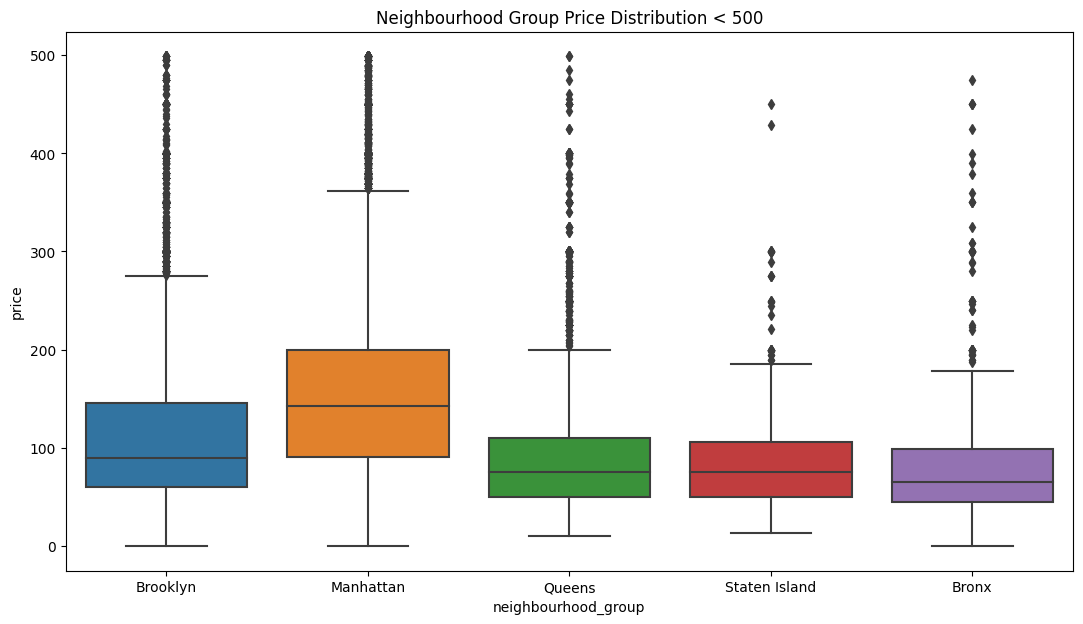

In [ ]:
# Chart - 14 visualization code
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data =df[df.price<500])
plt.show()

##### 1. Why did you pick the specific chart?

From the boxplot above, we observe a couple of things about the distribution of prices for Airbnb in NYC.

##### 2. What is/are the insight(s) found from the chart?

We can state that Manhattan has the highest range price for the listings with about $140 as an average price, followed by Brooklyn with 90 dollar per night,
Queens and Staten Island seem to have a very similar distribution,
The Bronx is the cheapest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No there is no insights that lead to negative growth.

#### Chart - 15 - Correlation Heatmap

<ipython-input-42-0694197ee718>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


<Axes: >

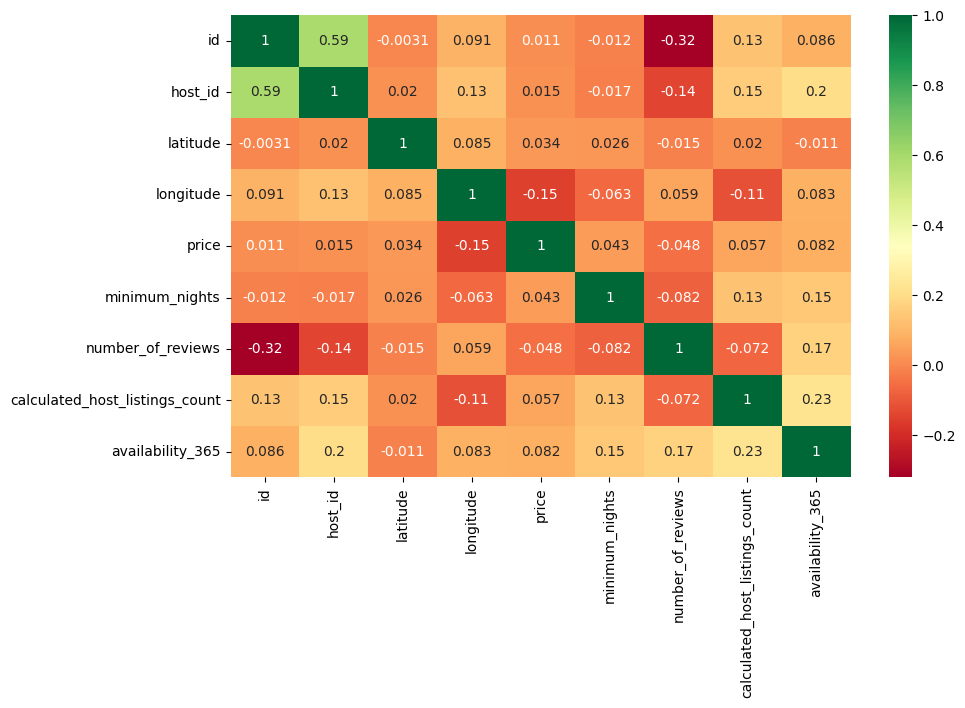

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that no_of_reviews is correlated to availability_365.Also there’s some correlation between min_nights, no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

#### Chart - 16 - Pair Plot 

<Figure size 1200x800 with 0 Axes>

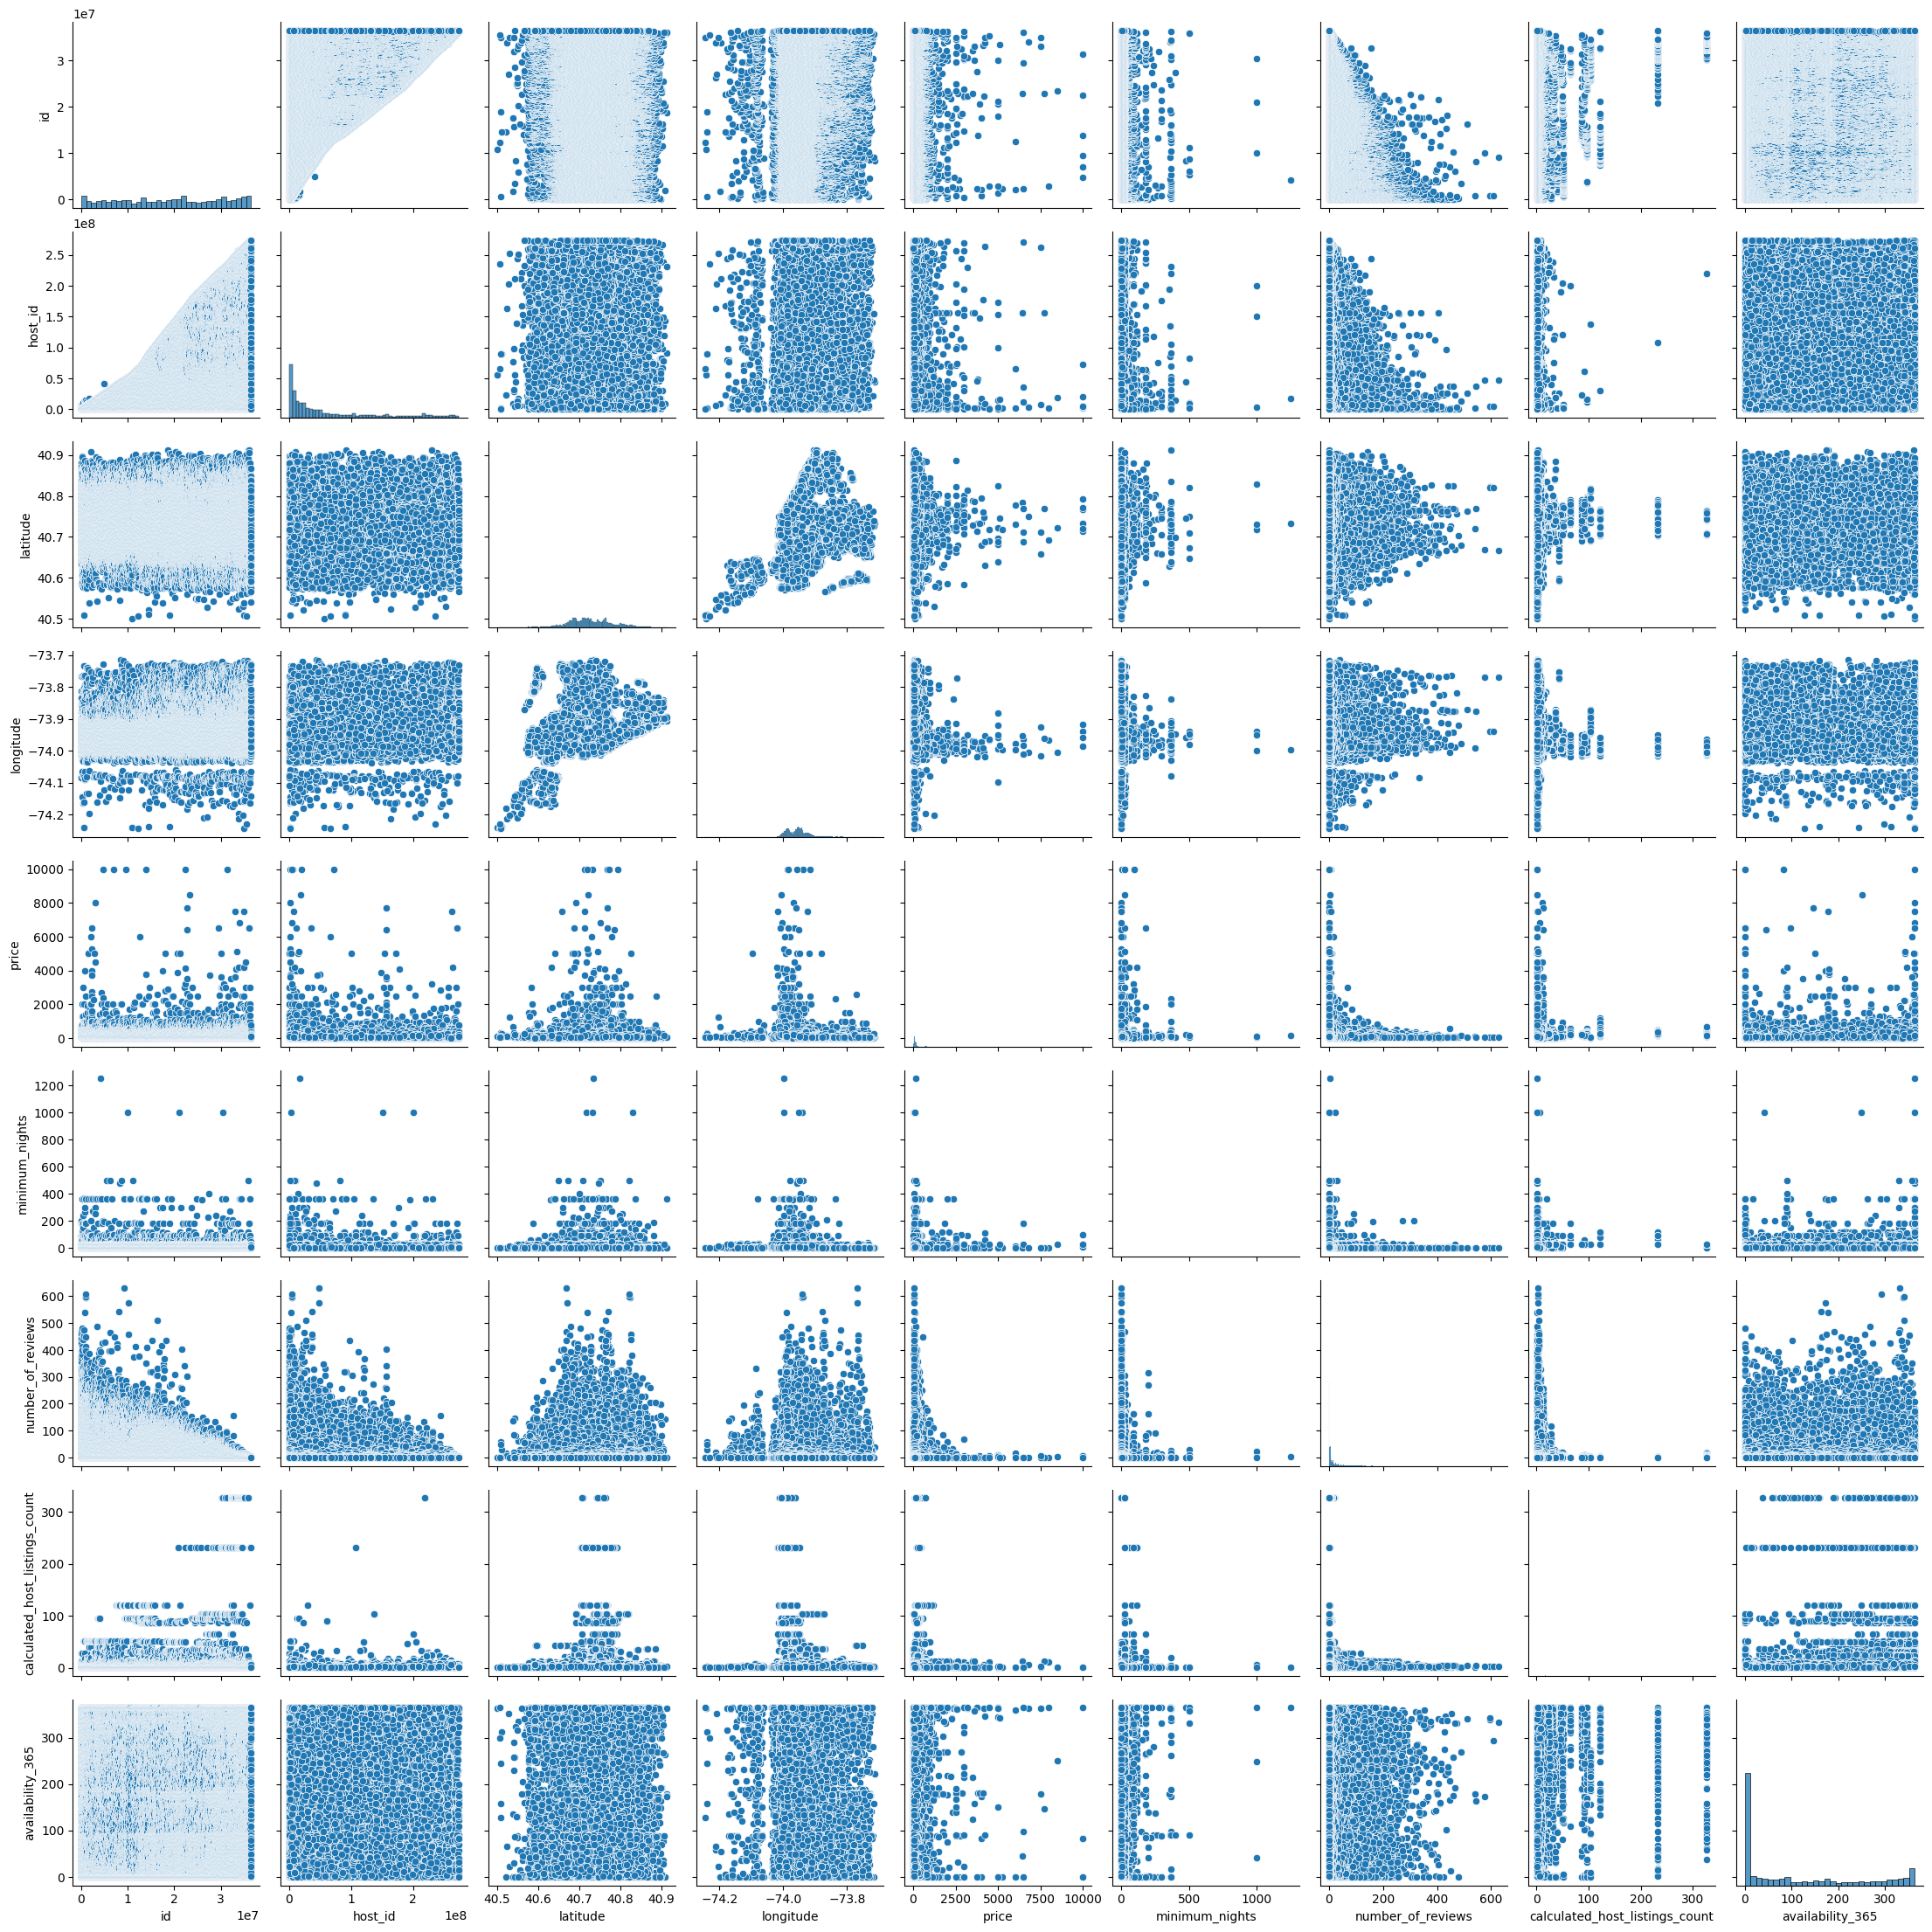

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows us to see both distribution of single variables and relationships between two variables.

##### 2. What is/are the insight(s) found from the chart?

From the chart the no_of_reviews is correlated to availability_365.Also there’s some correlation between min_nights, no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

##1.The Apartment and Private data is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently.steps should be taken to increase the use of  shared rooms.##
##2. Manhattan and Brooklyn has more number of listing that the Queens,Bronx and Staten island.steps should be taken to increase listings in other neighbhour group.##
##3.For any traveller, the most important thing is the price since this sets the budget of his/her trip. So priced should be normal.##
##4.Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. Based on the review score(Minimum 50)  increases the confidence of tourist before booking.So team should figure out the review , how each neighbourhood is doing in respect to review.##
##5.Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: Fort Wadsworth & Sea Gate, origins from Staten Island & Brooklyn respectively,steps should be taken to increase the value counts in other neighbourhood groups.##

# **Conclusion**

##1.Manhattan has most number of listings,followed by Brooklyn and Queens.Staten island has least number of listings.##

##2.Manhattan and Brookyln make up for 87% of listings available in NYC.##

##3.The maximum demand is for private rooms and entire home/apartment.##

##4.The Prices ranges from  0−180. But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. Also, we can see from the below there are few few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.##

##5.For any traveller, the most important thing is the price since this sets the budget of his/her trip. So the average price per night for different room type and based on neighbourhood group is different. Staying at a Apartment is always an expensive stay than shared room/private rooms for any location. This is so because Entire room is rented out by family for nice stay where privacy is also one of the major factor. Whereas Stay at Shared rooms are being preferred by travellers who generally don't wish to stay for long time at a particular place and moves around places quickly.##


##6. Shared room at staten Island is the most cheapest stay per night whereas Renting a Entire apartment/Home at Manhattan per night is the most expensive.##

##7. Average price for Private room is also considerably expensive at manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.##

##8. Bronx is the most cheapest stay in terms of neighbourhood group comparison in respect to room type.##

##9. Though Shared room at Staten Island is the cheapest whereas Apartment renting is not cheapest at Staten Island. This can be due to the location of a perfect gateway from the rush of the city for a quality time with family get together.##

##10.The Fort Wadsworth is the most expensive in terms of neighbourhood. Whereas Bull's head locality is the least expensive to stay.##

##11.Williamsburg has most number of listing count where as Fort Wadesworth has one of the least listing i.e 1.##

##12. Brooklyn got most review in comparison to Manhattan . Also Staten Island which is cheaper has less review than the other neighbourhood group.##

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***